In [68]:
%cd /home/skoltsov/Neural_Topic_Models

/home/skoltsov/Neural_Topic_Models


In [69]:
from gensim.models.coherencemodel import CoherenceModel
from utils import calc_topic_coherence as coher
from dataset import DocDataset
import torch
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import gensim
import re
import time
from gensim import corpora
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel

# GSM

Processed 17300 documents.
lenta_lem_1
-------------


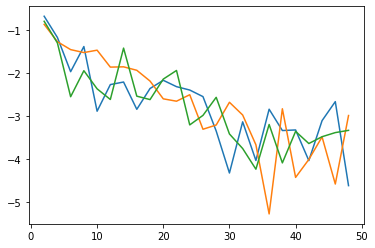

-------------
Processed 17300 documents.
lenta_lem_2
-------------


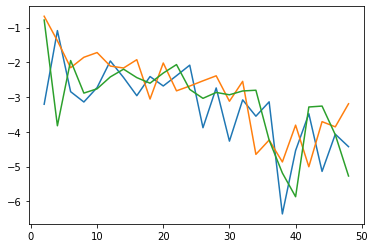

-------------
Processed 15423 documents.
20topicsnews_lem_1
-------------


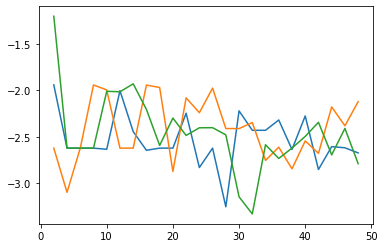

-------------
Processed 15423 documents.
20topicsnews_lem_2
-------------


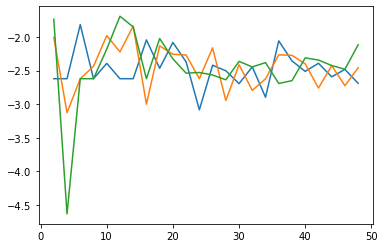

-------------


In [70]:
tasknames = ['lenta_lem_1', 'lenta_lem_2', '20topicsnews_lem_1', '20topicsnews_lem_2']

for taskname in tasknames:
    fig1, ax1 = plt.subplots()
    df = (pd.read_csv(taskname+'.csv', header=None)).rename(columns={0:'docs'})
    df = df['docs'].to_list()
    texts = [[text for text in doc.split()] for doc in df]
    dictionary = corpora.Dictionary(texts)
    docSet = DocDataset(taskname,no_below=10,no_above=0.7,rebuild=False,use_tfidf=False)
    gensim_dictionary = docSet.dictionary
    gensim_corpus = [gensim_dictionary.doc2bow(token, allow_update=True) for token in texts]
    for index in range(1,4):
        coherence_all=[]
        for topics in range(2,50,2):
            model = torch.load('results/GSM/GSM_' + taskname + '_' + str(topics) +'_' + str(index))
            topics = model.show_topic_words(topK=5)
            cm = CoherenceModel(topics=topics, corpus=gensim_corpus, dictionary=gensim_dictionary, coherence='u_mass')
            coherence = cm.get_coherence()
            coherence_all.append(coherence)
        ax1.plot([2*i for i in range(1,25)], coherence_all)
    print(taskname)
    print('-------------')
    plt.show()
    print('-------------')
    #topic_words = pd.DataFrame(topic_words, columns=[vocab])
    #path = 'results/lenta/matrices/'+ emb + '_' + str(topics) + '_train_' + str(train) + '.csv'
    #topic_words.to_csv(path)#сохраняем phi
        

# WTM-MMD

Processed 17300 documents.
lenta_lem_1
-------------


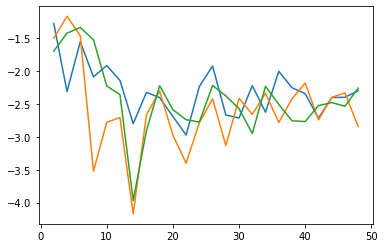

-------------
Processed 17300 documents.
lenta_lem_2
-------------


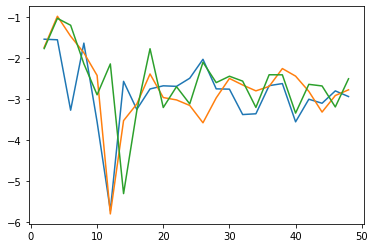

-------------
Processed 15423 documents.
20topicsnews_lem_1
-------------


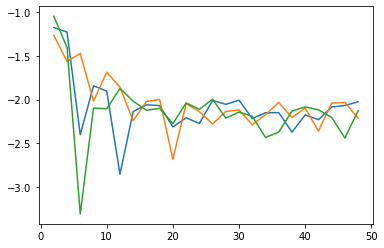

-------------
Processed 15423 documents.
20topicsnews_lem_2
-------------


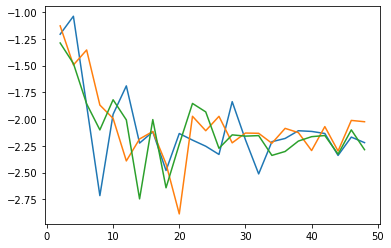

-------------


In [71]:
tasknames = ['lenta_lem_1', 'lenta_lem_2', '20topicsnews_lem_1', '20topicsnews_lem_2']

for taskname in tasknames:
    fig1, ax1 = plt.subplots()
    df = (pd.read_csv(taskname+'.csv', header=None)).rename(columns={0:'docs'})
    df = df['docs'].to_list()
    texts = [[text for text in doc.split()] for doc in df]
    dictionary = corpora.Dictionary(texts)
    docSet = DocDataset(taskname,no_below=10,no_above=0.7,rebuild=False,use_tfidf=False)
    gensim_dictionary = docSet.dictionary
    gensim_corpus = [gensim_dictionary.doc2bow(token, allow_update=True) for token in texts]
    for index in range(1,4):
        coherence_all=[]
        for topics in range(2,50,2):
            model = torch.load('results/WTM-MMD/WTM-MMD_' + taskname + '_' + str(topics) +'_' + str(index))
            topics = model.show_topic_words(topK=5)
            cm = CoherenceModel(topics=topics, corpus=gensim_corpus, dictionary=gensim_dictionary, coherence='u_mass')
            coherence = cm.get_coherence()
            coherence_all.append(coherence)
        ax1.plot([2*i for i in range(1,25)], coherence_all)
    print(taskname)
    print('-------------')
    plt.show()
    print('-------------')
    #topic_words = pd.DataFrame(topic_words, columns=[vocab])
    #path = 'results/lenta/matrices/'+ emb + '_' + str(topics) + '_train_' + str(train) + '.csv'
    #topic_words.to_csv(path)#сохраняем phi
        

# WTM-GMM

Processed 17300 documents.
lenta_lem_1
-------------


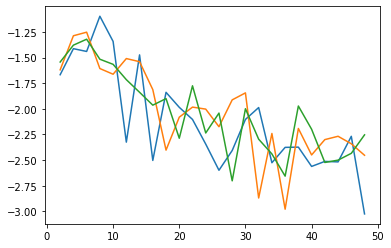

-------------
Processed 17300 documents.
lenta_lem_2
-------------


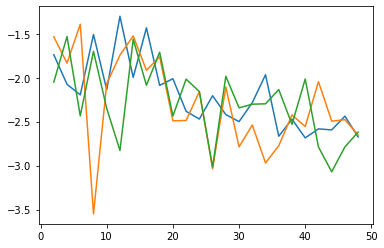

-------------
Processed 15423 documents.
20topicsnews_lem_1
-------------


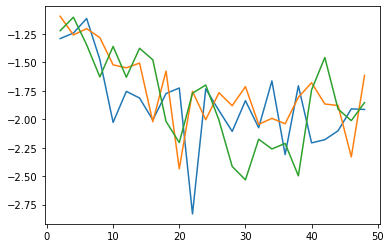

-------------
Processed 15423 documents.
20topicsnews_lem_2
-------------


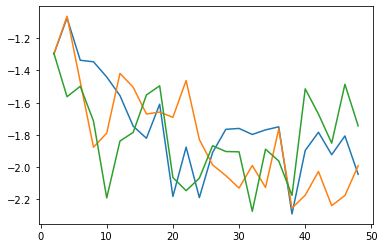

-------------


In [72]:
tasknames = ['lenta_lem_1', 'lenta_lem_2', '20topicsnews_lem_1', '20topicsnews_lem_2']

for taskname in tasknames:
    fig1, ax1 = plt.subplots()
    df = (pd.read_csv(taskname+'.csv', header=None)).rename(columns={0:'docs'})
    df = df['docs'].to_list()
    texts = [[text for text in doc.split()] for doc in df]
    dictionary = corpora.Dictionary(texts)
    docSet = DocDataset(taskname,no_below=10,no_above=0.7,rebuild=False,use_tfidf=False)
    gensim_dictionary = docSet.dictionary
    gensim_corpus = [gensim_dictionary.doc2bow(token, allow_update=True) for token in texts]
    for index in range(1,4):
        coherence_all=[]
        for topics in range(2,50,2):
            model = torch.load('results/WTM-GMM/WTM-GMM_' + taskname + '_' + str(topics) +'_' + str(index))
            topics = model.show_topic_words(topK=5)
            cm = CoherenceModel(topics=topics, corpus=gensim_corpus, dictionary=gensim_dictionary, coherence='u_mass')
            coherence = cm.get_coherence()
            coherence_all.append(coherence)
        ax1.plot([2*i for i in range(1,25)], coherence_all)
    print(taskname)
    print('-------------')
    plt.show()
    print('-------------')
    #topic_words = pd.DataFrame(topic_words, columns=[vocab])
    #path = 'results/lenta/matrices/'+ emb + '_' + str(topics) + '_train_' + str(train) + '.csv'
    #topic_words.to_csv(path)#сохраняем phi
        